In [69]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

%matplotlib inline

In [75]:
#file = pd.read_csv('clean_newauthors.csv')
# Necessitem l'ID per fer el match
file = pd.read_csv("author.csv")

In [76]:
Y_FC = pd.Series.to_frame(file['FC'])
Y_RT = pd.Series.to_frame(file['RT'])

X = file
X.drop('FC',axis=1,inplace=True)
X.drop('RT',axis=1,inplace=True)
X.drop('Unnamed: 0',axis=1,inplace=True)

In [77]:
X

,j_user,RT_l10,sd_RT,FC_l10,sd_FC
0,"{'id': 756431, 'id_str': '756431', 'name': 'Ar...",2.4,3.929377,15.5,32.022648
1,"{'id': 1622441, 'id_str': '1622441', 'name': '...",0.2,0.600000,0.8,0.979796
2,"{'id': 1770311, 'id_str': '1770311', 'name': '...",17.9,13.626812,37.2,40.931162
3,"{'id': 2107671, 'id_str': '2107671', 'name': '...",0.4,0.489898,1.7,3.796051
4,"{'id': 3127331, 'id_str': '3127331', 'name': '...",2.3,5.216321,3.4,6.545227
5,"{'id': 4869021, 'id_str': '4869021', 'name': '...",8.4,16.805951,76.1,127.668673
6,"{'id': 5254511, 'id_str': '5254511', 'name': '...",0.1,0.300000,0.4,0.489898
7,"{'id': 5380442, 'id_str': '5380442', 'name': '...",20.7,52.431002,49.7,98.777578
8,"{'id': 5793762, 'id_str': '5793762', 'name': '...",1.0,1.788854,3.8,5.249762
9,"{'id': 6709582, 'id_str': '6709582', 'name': '...",1.5,1.857418,14.1,21.215325


In [78]:
numl = len(X.index.values)
cols_num = ['id', 'followers_count','friends_count','listed_count','favourites_count','statuses_count']
for col in cols_num:
    X[col]=np.zeros(numl)

for line in range(numl):
    X['j_user'][line] =ast.literal_eval(X['j_user'][line])
    for col in cols_num:
        X[col][line] = int(X['j_user'][line][col])

C:\Users\Nuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Nuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
X.drop('j_user',axis=1,inplace=True)
X.head()

,RT_l10,sd_RT,FC_l10,sd_FC,id,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,2.4,3.929377,15.5,32.022648,756431.0,19645.0,949.0,662.0,12334.0,55829.0
1,0.2,0.600000,0.8,0.979796,1622441.0,4221.0,281.0,340.0,587.0,13650.0
2,17.9,13.626812,37.2,40.931162,1770311.0,1133925.0,1.0,9745.0,16.0,65228.0
3,0.4,0.489898,1.7,3.796051,2107671.0,5386.0,3861.0,304.0,15325.0,85493.0
4,2.3,5.216321,3.4,6.545227,3127331.0,1072.0,433.0,101.0,899.0,19893.0


In [80]:
# Separem Y_FC entre 5 grups: aquells que tenen menys de 10, aquells que tenen entre 11- 100, 
# aquells que tenen entre 101 - 1000, aquells que tenen entre 1000 i 5000 i aquells que tenen mes de 5000
# Fem 4 models, nomes per aquells que tenen a partir de 11

#print(Y_FC)
print('y0')
y0_fc = Y_FC[np.asarray(Y_FC)[:,0]<=10]
pes0 = (np.asarray(y0_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print(pes0)
hist, bin_edges = np.histogram(y0_fc)
print(hist)
print('\ny1:')
y1_fc = Y_FC[np.asarray(Y_FC)[:,0]>10]
y1_fc = y1_fc[np.asarray(y1_fc)[:,0]<=100]
pes1 = (np.asarray(y1_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print(pes1)
hist, bin_edges = np.histogram(y1_fc)
print(hist)
print('\ny2:')
y2_fc = Y_FC[np.asarray(Y_FC)[:,0]>100]
y2_fc = y2_fc[np.asarray(y2_fc)[:,0]<=1000]
pes2 = (np.asarray(y2_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print(pes2)
hist, bin_edges = np.histogram(y2_fc)
print(hist)
print('\ny3:')
y3_fc = Y_FC[np.asarray(Y_FC)[:,0]>1000]
y3_fc = y3_fc[np.asarray(y3_fc)[:,0]<=5000]
pes3 = (np.asarray(y3_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print(pes3)
hist, bin_edges = np.histogram(y3_fc)
print(hist)
print('\ny4:')
y4_fc = Y_FC[np.asarray(Y_FC)[:,0]>5000]
pes4 = (np.asarray(y4_fc).shape[0])/(np.asarray(Y_FC).shape[0])
print(pes4)
hist, bin_edges = np.histogram(y4_fc)
print(hist)

print('\n Suma de pesos:', pes0+pes1+pes2+pes3+pes4)

y0
0.8519764507989908
[921 501 213 110  74  57  46  29  31  44]

y1:
0.09251471825063078
[98 46 18 18 14 11  4  2  6  3]

y2:
0.029857022708158116
[24  8  7  3  8  5  4  5  4  3]

y3:
0.014297729184188394
[10  3  2  6  4  1  1  2  1  4]

y4:
0.011354079058031959
[14  5  2  4  0  1  0  0  0  1]

 Suma de pesos: 1.0


In [81]:
# Separem Y_RT entre 5 grups: aquells que tenen menys de 5, aquells que tenen entre 6- 20, 
# aquells que tenen entre 21 - 100, aquells que tenen entre 100 i 500 i aquells que tenen mes de 500
# Fem 4 models, nomes per aquells que tenen a partir de 6

print('y0')
y0_rt = Y_RT[np.asarray(Y_RT)[:,0]<=5]
pes0 = (np.asarray(y0_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print(pes0)
hist, bin_edges = np.histogram(y0_rt)
print(hist)
print('\ny1:')
y1_rt = Y_RT[np.asarray(Y_RT)[:,0]>5]
y1_rt = y1_rt[np.asarray(y1_rt)[:,0]<=20]
pes1 = (np.asarray(y1_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print(pes1)
hist, bin_edges = np.histogram(y1_rt)
print(hist)
print('\ny2:')
y2_rt = Y_RT[np.asarray(Y_RT)[:,0]>20]
y2_rt = y2_rt[np.asarray(y2_rt)[:,0]<=100]
pes2 = (np.asarray(y2_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print(pes2)
hist, bin_edges = np.histogram(y2_rt)
print(hist)
print('\ny3:')
y3_rt = Y_RT[np.asarray(Y_RT)[:,0]>100]
y3_rt = y3_rt[np.asarray(y3_rt)[:,0]<=500]
pes3 = (np.asarray(y3_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print(pes3)
hist, bin_edges = np.histogram(y3_rt)
print(hist)
print('\ny4:')
y4_rt = Y_RT[np.asarray(Y_RT)[:,0]>500]
pes4 = (np.asarray(y4_rt).shape[0])/(np.asarray(Y_RT).shape[0])
print(pes4)
hist, bin_edges = np.histogram(y4_rt)
print(hist)

print('\n Suma de pesos:', pes0+pes1+pes2+pes3+pes4)

y0
0.8717409587888982
[1535    0  278    0  109    0   77    0   40   34]

y1:
0.06265769554247266
[50 21 27 11 10 10  2  7  3  8]

y2:
0.03280067283431455
[19 11 15  9  6  4  3  3  4  4]

y3:
0.017661900756938603
[7 5 9 2 8 1 4 1 2 3]

y4:
0.015138772077375946
[22  7  2  2  0  1  1  0  0  1]

 Suma de pesos: 1.0


In [82]:
X['class_fc'] = np.zeros(X.shape[0])
X['class_rt'] = np.zeros(X.shape[0])

X['class_fc'][y1_fc.index] = 1
X['class_fc'][y2_fc.index] = 2
X['class_fc'][y3_fc.index] = 3
X['class_fc'][y4_fc.index] = 4

X['class_rt'][y1_rt.index] = 1
X['class_rt'][y2_rt.index] = 2
X['class_rt'][y3_rt.index] = 3
X['class_rt'][y4_rt.index] = 4

file.to_csv('X_classes_new_authors.csv')

X

,RT_l10,sd_RT,FC_l10,sd_FC,id,followers_count,friends_count,listed_count,favourites_count,statuses_count,class_fc,class_rt
0,2.4,3.929377,15.5,32.022648,7.564310e+05,19645.0,949.0,662.0,12334.0,55829.0,0.0,0.0
1,0.2,0.600000,0.8,0.979796,1.622441e+06,4221.0,281.0,340.0,587.0,13650.0,0.0,0.0
2,17.9,13.626812,37.2,40.931162,1.770311e+06,1133925.0,1.0,9745.0,16.0,65228.0,1.0,1.0
3,0.4,0.489898,1.7,3.796051,2.107671e+06,5386.0,3861.0,304.0,15325.0,85493.0,0.0,0.0
4,2.3,5.216321,3.4,6.545227,3.127331e+06,1072.0,433.0,101.0,899.0,19893.0,0.0,0.0
5,8.4,16.805951,76.1,127.668673,4.869021e+06,24075.0,100.0,96.0,20991.0,10496.0,1.0,0.0
6,0.1,0.300000,0.4,0.489898,5.254511e+06,1100.0,210.0,132.0,522.0,4563.0,0.0,0.0
7,20.7,52.431002,49.7,98.777578,5.380442e+06,17967.0,657.0,330.0,10178.0,56196.0,1.0,0.0
8,1.0,1.788854,3.8,5.249762,5.793762e+06,7468.0,798.0,232.0,16528.0,64528.0,0.0,0.0
9,1.5,1.857418,14.1,21.215325,6.709582e+06,3587.0,1465.0,273.0,8470.0,12345.0,0.0,0.0


C:\Users\Nuria\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0x1baa2624080>,
 'caps': [<matplotlib.lines.Line2D at 0x1baa24aef98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1baa2624630>,
 'medians': [<matplotlib.lines.Line2D at 0x1baa24ae978>,
 'fliers': [<matplotlib.lines.Line2D at 0x1baa24ae0b8>,
 'means': []}

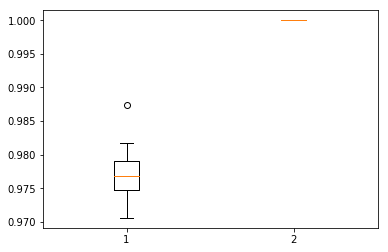

In [83]:
# Primer pas fer el model per classificar les classes!
## Segons les proves fetes per l'elia selecciono els models seguents...
## Amb 5 classes el model empitjora..

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
##Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

###for RT
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),2))
class_rt = X['class_rt']
class_fc = X['class_fc']
X_model = X.drop('class_rt',axis=1)
X_model = X.drop('class_fc',axis=1)
X_model = X.drop('id', axis = 1)

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_model, class_rt, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) #3NN ###BEST ONE!!
    nn3.fit(X_train_scaled,y_train)
    yhat_nn3 = nn3.predict(X_test_scaled)
    
    
    gauss = GaussianNB() #Gaussian ##best one!!
    gauss.fit(X_train_scaled,y_train)
    yhat_gauss = gauss.predict(X_test_scaled) 
    

    acc[i,0] = metrics.accuracy_score(y_test,yhat_nn3)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_gauss)

fig = plt.figure()
plt.boxplot(acc)

C:\Users\Nuria\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


{'whiskers': [<matplotlib.lines.Line2D at 0x1baa2628940>,
 'caps': [<matplotlib.lines.Line2D at 0x1baa2622b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1baa26287f0>,
 'medians': [<matplotlib.lines.Line2D at 0x1baa2622f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x1baa2622160>,
 'means': []}

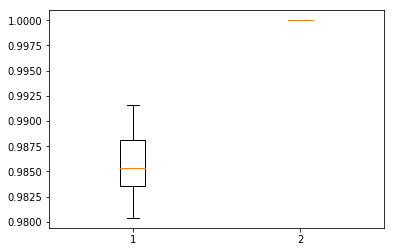

In [84]:

###for FC
r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),2))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_model, class_fc, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    scaler = StandardScaler()
    scaler = scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test) 

    nn3 = neighbors.KNeighborsClassifier(n_neighbors=3) #3NN ###BEST ONE!!
    nn3.fit(X_train_scaled,y_train)
    yhat_nn3 = nn3.predict(X_test_scaled)
    
    gauss = GaussianNB() #Gaussian ##best one!!
    gauss.fit(X_train_scaled,y_train)
    yhat_gauss = gauss.predict(X_test_scaled) 
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_nn3)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_gauss)


fig = plt.figure()
plt.boxplot(acc)

In [115]:
# Carreguem la base de twits ara per afegir les columnes de les classes i el dataset per fer models x classes!

file = pd.read_csv("tweet.csv")
file.drop('Unnamed: 0',axis=1,inplace=True)
file.drop('id',axis=1,inplace=True)

In [116]:
print(file.shape)
file.head()

(32831, 8)


,Tweet,j_user,created_at,entities,followers_user,FC,RT,trending_topic
0,Desde el #FCJumilla damos nuestra más sincera ...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:58:44,"{'hashtags': [{'text': 'FCJumilla', 'indices':...",7162,18,4,0.0
1,Me estoy volviendo loca hasta por cada una de ...,"{'id': 713359736, 'id_str': '713359736', 'name...",2018-09-24 03:05:47,"{'hashtags': [], 'symbols': [], 'user_mentions...",531,0,0,0.0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:38:18,"{'hashtags': [{'text': 'FCJumilla', 'indices':...",7162,4,2,0.0
3,📹 | El vestuario del #FCJumilla en La Condomin...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:19:29,"{'hashtags': [{'text': 'FCJumilla', 'indices':...",7162,21,6,0.0
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:10:30,"{'hashtags': [{'text': 'UCAMMurciaJumilla', 'i...",7162,0,0,0.0


In [117]:
# Anem a fer el match per IDs
## Primer preparem la base de twits..

numl = len(file.index.values)
file['hashtags']=np.zeros(numl)
file['hashtags_text']=np.zeros(numl)
file['id']=np.zeros(numl)


for line in range(numl):
    file['entities'][line] =ast.literal_eval(file['entities'][line])
    file['hashtags'][line] = file['entities'][line]['hashtags'] 
    if int(len(str(file['hashtags'][line]))>10):
        file['hashtags_text'][line] = str(file['hashtags'][line]).split(':')[1].split(',')[:-1]
    file['j_user'][line] =ast.literal_eval(file['j_user'][line])
    file['id'][line] = file['j_user'][line]['id']
    
file.drop('entities',axis=1,inplace=True)
file.drop('hashtags',axis=1,inplace=True)
file['hashtags_text'] = str(file['hashtags_text'])

# Creem variable numerica amb l'hora del tweet
# Per a aixo s'ha dintroduir al model l'hora en que la persona fa la consulta!!!
file['hour'] = np.zeros(numl)
for i in range(len(file)):
    file['hour'][i] = int(file['created_at'][i][11:13])

# Substituim per 0 els registres amb NaNs

file[file["trending_topic"].isnull()]
#file= file.drop(file[file["trending_topic"].isnull()].index,axis= 0) 
file = file.fillna(value={"trending_topic":0}) 

file.head()

C:\Users\Nuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Nuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Nuria\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Nuria\Anacon

,Tweet,j_user,created_at,followers_user,FC,RT,trending_topic,hashtags_text,id,hour
0,Desde el #FCJumilla damos nuestra más sincera ...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:58:44,7162,18,4,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0
1,Me estoy volviendo loca hasta por cada una de ...,"{'id': 713359736, 'id_str': '713359736', 'name...",2018-09-24 03:05:47,531,0,0,0.0,0 [ 'FCJumilla']\n1 ...,7.133597e+08,3.0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:38:18,7162,4,2,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0
3,📹 | El vestuario del #FCJumilla en La Condomin...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:19:29,7162,21,6,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:10:30,7162,0,0,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0


In [118]:
file.to_csv('tweet_amb_ids.csv')

In [129]:
# Fem el match per ids

match = [ list(X['id']).index(x) if x in list(X['id']) else None for x in list(file['id']) ]
file['class_rt'] = np.zeros(len(match))
file['class_fc'] = np.zeros(len(match))
k = 0
for i in range(len(match)):
    if match[i] == None:
        k+=1
    else:
        file['class_rt'][i] = X['class_rt'][match[i]]
        file['class_fc'][i] = X['class_fc'][match[i]]
print(k)
file.head()

C:\Users\Nuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Nuria\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


4779


,Tweet,j_user,created_at,followers_user,FC,RT,trending_topic,hashtags_text,id,hour,class_rt,class_fc
0,Desde el #FCJumilla damos nuestra más sincera ...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:58:44,7162,18,4,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0,0.0,1.0
1,Me estoy volviendo loca hasta por cada una de ...,"{'id': 713359736, 'id_str': '713359736', 'name...",2018-09-24 03:05:47,531,0,0,0.0,0 [ 'FCJumilla']\n1 ...,7.133597e+08,3.0,0.0,0.0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:38:18,7162,4,2,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0,0.0,1.0
3,📹 | El vestuario del #FCJumilla en La Condomin...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:19:29,7162,21,6,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0,0.0,1.0
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,"{'id': 2664945430, 'id_str': '2664945430', 'na...",2018-09-30 15:10:30,7162,0,0,0.0,0 [ 'FCJumilla']\n1 ...,2.664945e+09,15.0,0.0,1.0


In [130]:
file.to_csv('tweet_amb_ids_match.csv')